In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from newdust.graindist import *
from newdust import *

In [3]:
A0  = 10.0
MD  = 1.e22 * constants.m_p * 0.009  # g cm^-2

SIL      = composition.CmSilicate()
GRA_para = composition.CmGraphite(orient='para')
GRA_perp = composition.CmGraphite(orient='perp')

In [4]:
EVALS = np.logspace(-1,np.log10(20.),100)
THVALS = np.logspace(0.0,2.0,5)

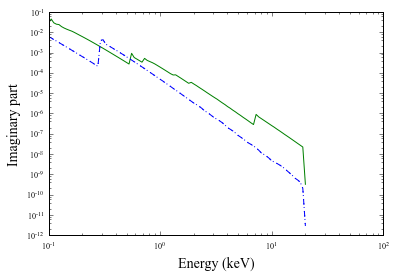

In [5]:
plt.plot(EVALS, SIL.ip(EVALS, unit='kev'), 'g', label='Silicate')
plt.plot(EVALS, GRA_para.ip(EVALS, unit='kev'), 'b--', label='Graphite (parallel)')
plt.plot(EVALS, GRA_perp.ip(EVALS, unit='kev'), 'b:', label='Graphite (perpendicular)')
plt.loglog()
plt.xlabel("Energy (keV)", size=14)
plt.ylabel("Imaginary part", size=14)

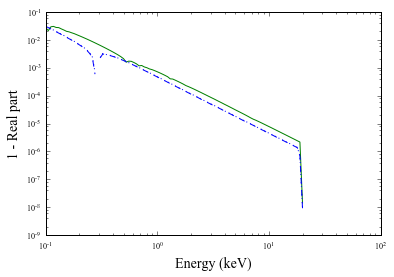

In [6]:
plt.plot(EVALS, 1.0 - SIL.rp(EVALS, unit='kev'), 'g', label='Silicate')
plt.plot(EVALS, 1.0 - GRA_para.rp(EVALS, unit='kev'), 'b--', label='Graphite (parallel)')
plt.plot(EVALS, 1.0 - GRA_perp.rp(EVALS, unit='kev'), 'b:', label='Graphite (perpendicular)')
plt.loglog()
plt.xlabel("Energy (keV)", size=14)
plt.ylabel("1 - Real part", size=14)

No real difference between grain sizes for the parallel vs perpendicular graphite.

In [7]:
ABIG  = 1.0
big_sil = SingleGrainPop('Grain', 'Silicate', 'Mie', amax=ABIG, md=MD)
big_gra = SingleGrainPop('Grain', 'Graphite', 'Mie', amax=ABIG, md=MD)

In [8]:
%%time
big_sil.calculate_ext(EVALS, unit='kev', theta=THVALS)

CPU times: user 43.2 s, sys: 556 ms, total: 43.8 s
Wall time: 47 s


In [9]:
%%time
big_gra.calculate_ext(EVALS, unit='kev', theta=THVALS)

CPU times: user 39.6 s, sys: 405 ms, total: 40 s
Wall time: 40.9 s


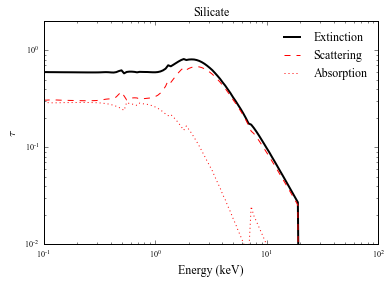

In [10]:
ax = plt.subplot(111)
big_sil.plot_ext(ax, 'all')
plt.loglog()
ax.set_ylim(0.01, 2)
plt.title('Silicate')

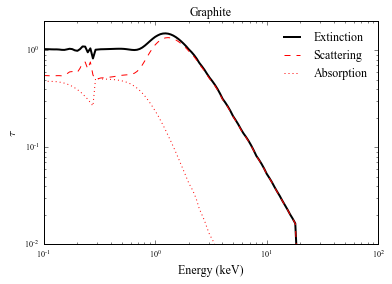

In [11]:
ax = plt.subplot(111)
big_gra.plot_ext(ax, 'all')
plt.loglog()
ax.set_ylim(0.01, 2)
plt.title('Graphite')

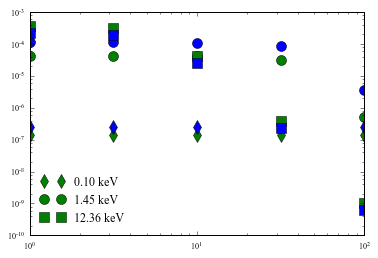

In [12]:
inds = [0, 50, -10]
ms   = dict(zip(inds,['d','o','s']))
for i in inds:
    plt.plot(THVALS, big_sil.int_diff[i], 'g', ls='',
             marker=ms[i], markersize=10, label='%.2f keV' % EVALS[i])
    plt.plot(THVALS, big_gra.int_diff[i], 'b', ls='', marker=ms[i], markersize=10)
plt.loglog()
plt.legend(loc='lower left', frameon=False)

In [13]:
giant_sil = SingleGrainPop('Grain', 'Silicate', 'Mie', amax=A0, md=MD)
giant_gra = SingleGrainPop('Grain', 'Graphite', 'Mie', amax=A0, md=MD)

In [14]:
%%time
giant_sil.calculate_ext(EVALS, unit='kev', theta=THVALS)

CPU times: user 6min 48s, sys: 5.43 s, total: 6min 54s
Wall time: 7min 37s


In [15]:
%%time
giant_gra.calculate_ext(EVALS, unit='kev', theta=THVALS)

CPU times: user 6min 15s, sys: 3.94 s, total: 6min 19s
Wall time: 6min 30s


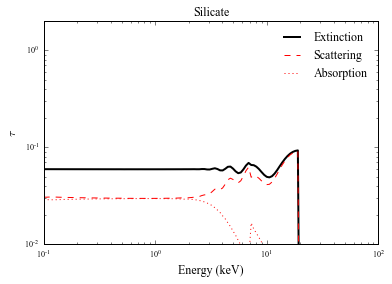

In [16]:
ax = plt.subplot(111)
giant_sil.plot_ext(ax, 'all')
plt.loglog()
ax.set_ylim(0.01, 2)
plt.title('Silicate')

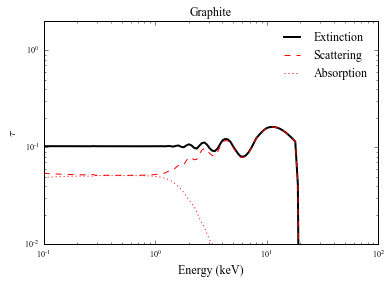

In [17]:
ax = plt.subplot(111)
giant_gra.plot_ext(ax, 'all')
plt.loglog()
ax.set_ylim(0.01, 2)
plt.title('Graphite')

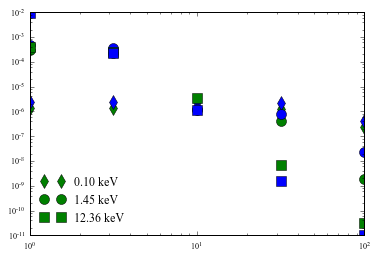

In [18]:
inds = [0, 50, -10]
ms   = dict(zip(inds,['d','o','s']))
for i in inds:
    plt.plot(THVALS, giant_sil.int_diff[i], 'g', ls='',
             marker=ms[i], markersize=10, label='%.2f keV' % EVALS[i])
    plt.plot(THVALS, giant_gra.int_diff[i], 'b', ls='', marker=ms[i], markersize=10)
plt.loglog()
plt.legend(loc='lower left', frameon=False)

Make a giant comparison plot

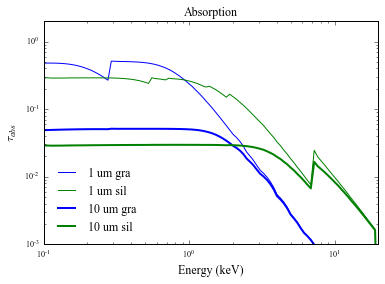

In [19]:
ax = plt.subplot(111)
big_gra.plot_ext(ax, 'abs', color='b', lw=1, label='1 um gra')
big_sil.plot_ext(ax, 'abs', color='g', lw=1, label='1 um sil')
giant_gra.plot_ext(ax, 'abs', color='b', lw=2, label='10 um gra')
giant_sil.plot_ext(ax, 'abs', color='g', lw=2, label='10 um sil')
plt.loglog()
plt.xlim(0.1, 20)
plt.ylim(0.001, 2)
plt.title("Absorption")
plt.legend(loc='lower left', frameon=False)

Starts to flatten out around $E_{kev} < \sqrt{a_{um}}$